Лысенко Данил, 521 группа



---


**Задание**

*Протестировать модель Pagerank на примере датасетов станций лондонского метро и московской транспортной системы, изучить зависимость результатов топ-станций от значения "параметра телепортации".*


---



In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Скачивание датасета лондонского метро, и графа москвовского метро в формате dot


In [2]:
!wget https://raw.githubusercontent.com/drnextgis/moscow_subway_graph/master/moscow_subway_ru.dot
!wget https://raw.githubusercontent.com/RafaelPortacio/PyPagerank/main/london.stations.csv
!wget https://raw.githubusercontent.com/RafaelPortacio/PyPagerank/main/london.connections.csv


--2024-11-26 21:26:45--  https://raw.githubusercontent.com/drnextgis/moscow_subway_graph/master/moscow_subway_ru.dot
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15045 (15K) [text/plain]
Saving to: ‘moscow_subway_ru.dot.1’

moscow_subway_ru.do 100%[===================>]  14.69K  --.-KB/s    in 0s      

2024-11-26 21:26:46 (49.5 MB/s) - ‘moscow_subway_ru.dot.1’ saved [15045/15045]

--2024-11-26 21:26:46--  https://raw.githubusercontent.com/RafaelPortacio/PyPagerank/main/london.stations.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 O

In [3]:
edges_data = pd.read_csv('london.connections.csv')
edges_data.head()

station1  station2  line  time
0        11       163     1     1
1        11       212     1     2
2        49        87     1     1
3        49       197     1     2
4        82       163     1     2

In [4]:
nodes_data = pd.read_csv('london.stations.csv')
nodes_data.head()

id  latitude  longitude          name       display_name  zone  \
0   1   51.5028    -0.2801    Acton Town    Acton<br />Town   3.0   
1   2   51.5143    -0.0755       Aldgate                NaN   1.0   
2   3   51.5154    -0.0726  Aldgate East  Aldgate<br />East   1.0   
3   4   51.5107    -0.0130    All Saints    All<br />Saints   2.0   
4   5   51.5407    -0.2997      Alperton                NaN   4.0   

   total_lines  rail  
0            2     0  
1            2     0  
2            2     0  
3            1     0  
4            1     0

In [5]:
edges_df = pd.DataFrame(edges_data)
nodes_df = pd.DataFrame(nodes_data)

In [6]:
# Создание графа
G = nx.DiGraph()
for _, row in edges_df.iterrows():
    G.add_edge(row['station1'], row['station2'])
    G.add_edge(row['station2'], row['station1'])

In [7]:
# Добавление информации о станциях
node_attributes = nodes_df.set_index('id')[['latitude', 'longitude', 'name']].to_dict('index')
nx.set_node_attributes(G, node_attributes)

In [8]:
# Функция для вычисления PageRank с разными значениями alpha
def compute_pagerank(G, alpha_values):
    results = {}
    for alpha in alpha_values:
        pr = nx.pagerank(G, alpha=alpha)
        results[alpha] = pr
    return results

# Вычислим PageRank для различных alpha
alpha_values = [0, 0.1, 0.5, 0.85, 0.9, 0.95]
pagerank_results = compute_pagerank(G, alpha_values)

# Вывод топ-станций для каждого alpha
for alpha, ranks in pagerank_results.items():
    print(f"\nPageRank results for alpha={alpha}:")
    top_stations = sorted(ranks.items(), key=lambda x: x[1], reverse=True)
    for station, rank in top_stations[:12]:
        print(f"Station {station} ({G.nodes[station]['name']}): {rank:.4f}")

# Визуализация графа с учетом PageRank
def visualize_graph(G, pagerank):
    plt.figure(figsize=(100, 60))
    pos = {node: (G.nodes[node]['longitude'], G.nodes[node]['latitude']) for node in G.nodes}
    sizes = [pagerank[node] * 100000 for node in G.nodes]
    nx.draw(G, pos, with_labels=True, labels=nx.get_node_attributes(G, 'name'), node_size=sizes, node_color="skyblue", edge_color="gray")
    plt.title("Graph Visualization with PageRank")
    plt.show()


PageRank results for alpha=0:
Station 11 (Baker Street): 0.0033
Station 163 (Marylebone): 0.0033
Station 212 (Regent's Park): 0.0033
Station 49 (Charing Cross): 0.0033
Station 87 (Embankment): 0.0033
Station 197 (Picadilly Circus): 0.0033
Station 82 (Edgware Road (B)): 0.0033
Station 193 (Paddington): 0.0033
Station 84 (Elephant & Castle): 0.0033
Station 148 (Lambeth North): 0.0033
Station 279 (Waterloo): 0.0033
Station 113 (Harlesden): 0.0033

PageRank results for alpha=0.1:
Station 145 (King's Cross St. Pancras): 0.0040
Station 11 (Baker Street): 0.0039
Station 74 (Earl's Court): 0.0039
Station 193 (Paddington): 0.0038
Station 245 (Stockwell): 0.0038
Station 46 (Chalfont & Latimer): 0.0038
Station 225 (Shadwell): 0.0038
Station 253 (Surrey Quays): 0.0037
Station 265 (Turnham Green): 0.0036
Station 279 (Waterloo): 0.0036
Station 295 (Whitechapel): 0.0036
Station 95 (Finsbury Park): 0.0036

PageRank results for alpha=0.5:
Station 145 (King's Cross St. Pancras): 0.0063
Station 11 (Bake

Самые загруженные станции по версии Википедии

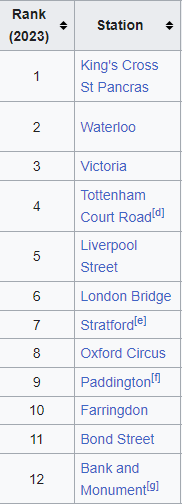

In [9]:
# Визуализируем для одного из значений alpha
visualize_graph(G, pagerank_results[0.5])

In [10]:
plt.figure(figsize=(150, 75))
pos = nx.kamada_kawai_layout(G)
sizes = [pagerank_results[0.5][node] * 100000 for node in G.nodes]
nx.draw_networkx_nodes(G, pos, node_size=sizes, node_color="green", alpha=0.9)
nx.draw_networkx_edges(G, pos, edge_color="gray", width=1.5, alpha=0.8)
nx.draw_networkx_labels(G, pos, labels=nx.get_node_attributes(G, 'name'), font_size=12, font_family='sans-serif', font_weight='bold', alpha=0.9)
plt.axis("off")
plt.title("Graph Visualization with PageRank", fontweight='bold', fontsize=20)
plt.show()

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

In [12]:
# Считывание графа из DOT файла
G = nx.Graph(nx.nx_pydot.read_dot('moscow_subway_ru.dot'))
G = nx.DiGraph(G)


In [13]:
# Функция для вычисления PageRank с разными значениями alpha
def compute_pagerank(G, alpha_values):
    results = {}
    for alpha in alpha_values:
        pr = nx.pagerank(G, alpha=alpha)
        results[alpha] = pr
    return results

# Задаем параметры alpha
alpha_values = [0, 0.1, 0.5, 0.85, 0.9, 0.95]
pagerank_results = compute_pagerank(G, alpha_values)

# Выводим топ-станций для каждого alpha
for alpha, ranks in pagerank_results.items():
    print(f"\nPageRank results for alpha={alpha}:")
    top_stations = sorted(ranks.items(), key=lambda x: x[1], reverse=True)
    for station, rank in top_stations[:12]:  # Топ-12 станций
        print(f"Station {station}: {rank:.4f}")


PageRank results for alpha=0:
Station Авиамоторная: 0.0053
Station Автозаводская: 0.0053
Station Академическая: 0.0053
Station Александровский сад: 0.0053
Station Алексеевская: 0.0053
Station Алма-Атинская: 0.0053
Station Алтуфьево: 0.0053
Station Аннино: 0.0053
Station Арбатская (3): 0.0053
Station Арбатская (4): 0.0053
Station Аэропорт: 0.0053
Station Бабушкинская: 0.0053

PageRank results for alpha=0.1:
Station Киевская (4): 0.0058
Station Красногвардейская: 0.0058
Station Библиотека им. Ленина: 0.0056
Station Арбатская (3): 0.0056
Station Севастопольская: 0.0055
Station Каширская (2): 0.0055
Station Кунцевская (3): 0.0055
Station Бабушкинская: 0.0055
Station Бибирево: 0.0055
Station Водный стадион: 0.0055
Station Митино: 0.0055
Station Новогиреево: 0.0055

PageRank results for alpha=0.5:
Station Киевская (4): 0.0079
Station Красногвардейская: 0.0072
Station Библиотека им. Ленина: 0.0068
Station Арбатская (3): 0.0068
Station Севастопольская: 0.0064
Station Киевская (3): 0.0064
Stat

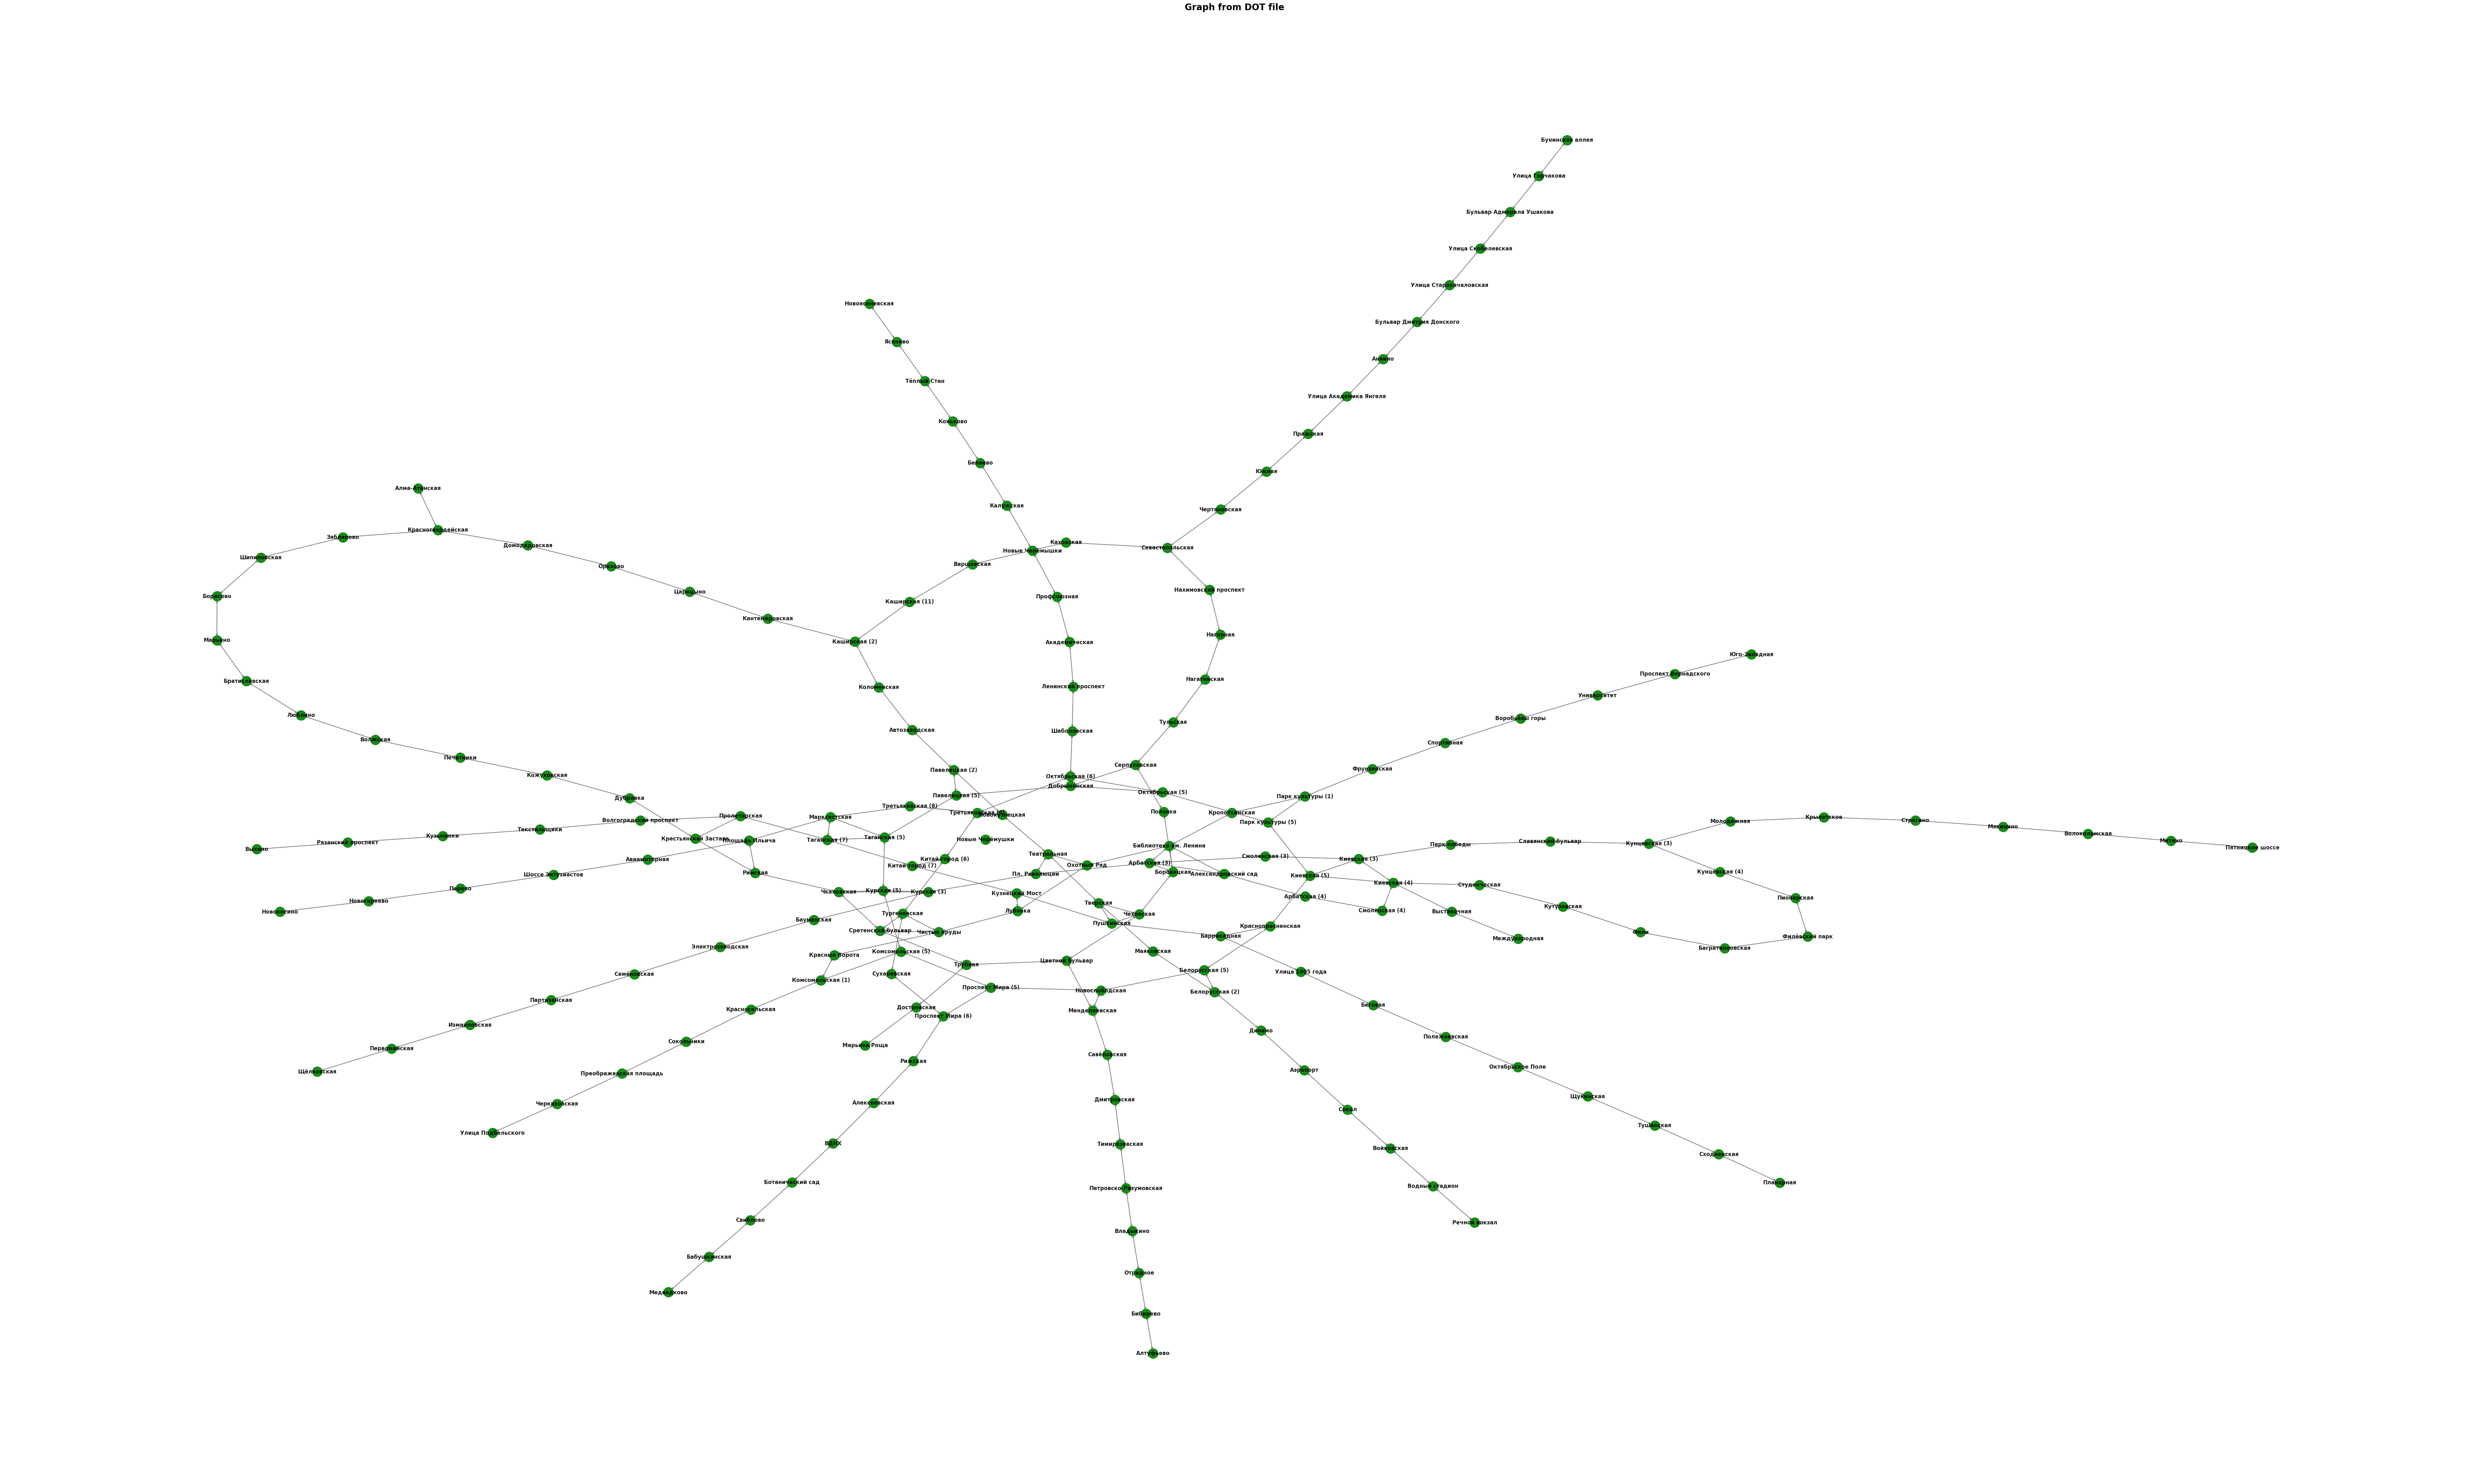

In [15]:
# Визуализация графа
plt.figure(figsize=(100, 60))
pos = nx.kamada_kawai_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=500, node_color="green", alpha=0.9)
nx.draw_networkx_edges(G, pos, edge_color="gray", width=1.5, alpha=0.8)
nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif', font_weight='bold', alpha=0.9)

plt.axis("off")
plt.title("Graph from DOT file", fontweight='bold', fontsize=20)
plt.show()